# 02_分子过滤：ADMET 和类先导化合物相似标准
## 在药物设计的背景下，通过候选分子的物理化学特性来过滤候选分子非常重要。本次，从 ChEMBL ( 01_讲解的内容 ) 获得的化合物将按照 Lipinsik 的五法则进行过滤，以仅保留口服生物可利用的化合物。

- ADMET——吸收、分布、代谢、排泄和毒性
- 先导化合物相似标准和 Lipinsik 五法则 (Ro5)
- 先导化合物相似标准情况下的雷达图

- 定义并可视化示例分子
- 计算并绘制Ro5的分子性质
- 考察Ro5的符合性
- 将Ro5应用于VEGFR2数据集
- 可视化Ro5属性(雷达图)

***在虚拟筛选中，我们的目的是预测一个化合物是否可能与特定的靶标结合并相互作用。然而，如果我们想要鉴定一种新的药物，同样重要的是这种化合物到达靶标并最终以有利的方式从体内移除。因此，我们也应该考虑一个化合物是否真正被摄入体内，是否能够跨越一定的障碍，从而达到它的目标。一旦它不再作用于靶点，它在代谢上是否稳定以及如何排泄?这些过程在药代动力学领域中被研究。与药效学( "药物对我们的身体有什么作用? ")不同，药代动力学处理的是"药物在我们体内发生了什么? "的问题。***

## （1）ADMET - -吸收、分布、代谢、排泄和毒性
药动学主要分为吸收、分布、代谢和排泄4个步骤。这些被概括为ADME。通常，ADME还包括毒理学，因此被称为ADMET或ADMETox。下面将更详细地讨论ADME步骤：
- 吸收：药物进入体内的量和时间取决于多种因素，这些因素因人而异，因人而异，也因物质的性质而异。化合物的溶解度(差)、胃排空时间、肠道转运时间、在胃中的化学( in - )稳定性、渗透肠壁的( in - )能力等因素都会影响药物在口服、吸入或接触皮肤后的吸收程度。
- 分布：吸收的物质，即在体内，在血液和不同组织之间以及穿越血脑屏障的分布受区域血流速度、化合物的分子大小和极性以及与血清蛋白和转运酶结合的影响。在毒理学方面的关键影响可能是高度非极性物质在脂肪组织中的积累，或穿越血脑屏障。
- 代谢：化合物进入体内后，会发生代谢。这意味着该化合物只有一部分能真正达到目标。主要是肝脏和肾脏酶负责分解外源物(是身体外在的物质)。
- 排泄：化合物及其代谢物需要通过排泄从体内排出，通常通过肾脏(尿液)或粪便排出。排泄不完全可导致外源物质蓄积或对正常代谢产生不利干扰。
- 毒性：Toxicity：药物对机体的毒性

## （2）类先导性和Lipinski五规则( Ro5 )
### 先导化合物是具有良好性能的开发性候选药物。它被用作起始结构并进行修饰，目的是开发有效的药物。除了生物活性(化合物与感兴趣的靶标结合)外，良好的ADME性质也是设计有效药物的重要标准。
### 化合物的生物利用度是一个重要的ADMET性质。引入Lipinski’s rule of five，仅根据化合物的化学结构来估计其生物利用度。Ro5指出如果化合物的化学结构违反下列规则之一以上，则该化合物吸收或渗透不良的可能性较大：
- 分子量( MWT ) < = 500 Da  (这个名字叫做道尔顿，不要读错了哦！❤️)
- 氢键受体数( HBAs ) < = 10
- 氢键供体数目( HBD ) < = 5
- 计算出Logp (octanol-water coefficient) < = 5

！！⚠️ 注：Ro5中所有数字均为5的倍数；这就是该规则名称的由来。


❤️补充说明：
- LogP又称分配coefficient or octanol-water coefficient。它测量化合物的分布，通常在疏水性(e.g. 1-octanol)和亲水性(e.g. water)相之间。
- 疏水性分子在水中的溶解度可能会降低，而更多的亲水性分子(例如,高数量的氢键受体和供体)或大分子(高分子量)在通过磷脂膜时可能会有更大的困难。

## （3）类先导性下的雷达图
- 分子性质，如Ro5性质，可以通过多种方式可视化(例如,craig plots, flower plots, or golden triangle图)，以支持药物化学家的解释

### ❤️我们需要用到第一小节的数据，再第一小节里面的 data 文件夹里面
- 保存最终的数据集
- output_df.to_csv(DATA / "bioactivities_compounds_VEGFR2.csv", index=False)
- 这一个数据文件：bioactivities_compounds_VEGFR2.csv

In [1]:
from pathlib import Path
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, PandasTools

In [2]:
from pathlib import Path
import os

# 获取当前工作目录
HERE = Path(os.getcwd())
DATA = HERE / 'data'
if not DATA.exists():
    DATA.mkdir(parents=True, exist_ok=True)
print(DATA)


/Users/wangyang/Desktop/AI-drug-design/list/02_Molecular_filtration_ADMET_lead_compound_similarity_criteria/data


调查 Ro5 的合规性

In [3]:
def calculate_ro5_properties(smiles):
    """
    测试输入分子（SMILES）是否符合利平斯基的五条规则。
    参数
    ----------
    smiles : str
    分子的 SMILES。
    返回值
    -------
    pandas.Series
    分子量、氢键受体/供体数量和 logP 值
    以及输入分子的利平斯基五则符合性。
    """
    # 来自 SMILES 的 RDKit 分子
    molecule = Chem.MolFromSmiles(smiles)
    # 计算与 Ro5 有关的化学特性
    molecular_weight = Descriptors.ExactMolWt(molecule)
    n_hba = Descriptors.NumHAcceptors(molecule)
    n_hbd = Descriptors.NumHDonors(molecule)
    logp = Descriptors.MolLogP(molecule)
    # 检查Ro5条件是否满足
    conditions = [molecular_weight <= 500, n_hba <= 10, n_hbd <= 5, logp <= 5]
    ro5_fulfilled = sum(conditions) >= 3
    # 如果四个条件中没有一个以上被违反，则返回 True
    return pd.Series(
        [molecular_weight, n_hba, n_hbd, logp, ro5_fulfilled],
        index=["molecular_weight", "n_hba", "n_hbd", "logp", "ro5_fulfilled"],
    )

将 Ro5 应用于 VEGFR2 数据集 ¶
calculate_ro5_properties 函数可应用于 Ro5 合规化合物的 VEGFR2 数据集。

In [4]:
molecules = pd.read_csv(DATA / "bioactivities_compounds_VEGFR2.csv", index_col=0)
print(molecules.shape)
molecules.head()

(7504, 4)


,IC50,units,smiles,pIC50
molecule_chembl_id,,,,
CHEMBL5189340,0.023,nM,CN(C)c1ccc(/C=N/NC(=O)Cn2nc(Cc3ccc(Cl)cc3)c3cc...,10.638272
CHEMBL429743,0.030,nM,COc1cc2nccc(Oc3ccc4c(C(=O)Nc5ccc(Cl)cc5)cccc4c...,10.522879
CHEMBL5186748,0.120,nM,CNC(=O)c1cc(Oc2ccc(NC(=O)c3nn(-c4ccc(Cl)cc4)cc...,9.920819
CHEMBL3093581,0.140,nM,O=C(Nc1ccc(Oc2ccc3nc(NC(=O)C4CC4)cn3c2)c(F)c1)...,9.853872
CHEMBL3586072,0.140,nM,CNC(=O)c1ccc(-c2ccc(NC(=O)Nc3cc(Br)cc(C(F)(F)F...,9.853872


In [5]:
# 过滤重复的化合物
molecules = molecules.drop_duplicates(subset="smiles")
print(molecules.shape)
molecules.head()

(7504, 4)


,IC50,units,smiles,pIC50
molecule_chembl_id,,,,
CHEMBL5189340,0.023,nM,CN(C)c1ccc(/C=N/NC(=O)Cn2nc(Cc3ccc(Cl)cc3)c3cc...,10.638272
CHEMBL429743,0.030,nM,COc1cc2nccc(Oc3ccc4c(C(=O)Nc5ccc(Cl)cc5)cccc4c...,10.522879
CHEMBL5186748,0.120,nM,CNC(=O)c1cc(Oc2ccc(NC(=O)c3nn(-c4ccc(Cl)cc4)cc...,9.920819
CHEMBL3093581,0.140,nM,O=C(Nc1ccc(Oc2ccc3nc(NC(=O)C4CC4)cn3c2)c(F)c1)...,9.853872
CHEMBL3586072,0.140,nM,CNC(=O)c1ccc(-c2ccc(NC(=O)Nc3cc(Br)cc(C(F)(F)F...,9.853872


将 Ro5 应用于所有分子。

In [6]:
# 这需要几秒钟
ro5_properties = molecules["smiles"].apply(calculate_ro5_properties)
ro5_properties.head()

,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
molecule_chembl_id,,,,,
CHEMBL5189340,473.161853,6,1,3.85700,True
CHEMBL429743,484.118985,5,1,7.10320,True
CHEMBL5186748,489.120382,7,2,3.99352,True
CHEMBL3093581,523.165582,7,2,5.01740,False
CHEMBL3586072,492.040873,3,3,5.53350,True


将分子与 Ro5 数据连接起来。

In [7]:
molecules = pd.concat([molecules, ro5_properties], axis=1)
molecules.head()

,IC50,units,smiles,pIC50,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
molecule_chembl_id,,,,,,,,,
CHEMBL5189340,0.023,nM,CN(C)c1ccc(/C=N/NC(=O)Cn2nc(Cc3ccc(Cl)cc3)c3cc...,10.638272,473.161853,6,1,3.85700,True
CHEMBL429743,0.030,nM,COc1cc2nccc(Oc3ccc4c(C(=O)Nc5ccc(Cl)cc5)cccc4c...,10.522879,484.118985,5,1,7.10320,True
CHEMBL5186748,0.120,nM,CNC(=O)c1cc(Oc2ccc(NC(=O)c3nn(-c4ccc(Cl)cc4)cc...,9.920819,489.120382,7,2,3.99352,True
CHEMBL3093581,0.140,nM,O=C(Nc1ccc(Oc2ccc3nc(NC(=O)C4CC4)cn3c2)c(F)c1)...,9.853872,523.165582,7,2,5.01740,False
CHEMBL3586072,0.140,nM,CNC(=O)c1ccc(-c2ccc(NC(=O)Nc3cc(Br)cc(C(F)(F)F...,9.853872,492.040873,3,3,5.53350,True


In [8]:
# 请注意，"ro5_fulfilled "列包含布尔值。
# 因此，我们可以直接使用列值来子集数据。
# 注意 ~ 否定布尔值。
molecules_ro5_fulfilled = molecules[molecules["ro5_fulfilled"]]
molecules_ro5_violated = molecules[~molecules["ro5_fulfilled"]]

print(f"# 未过滤数据集中的化合物: {molecules.shape[0]}")
print(f"# 过滤后数据集中的化合物: {molecules_ro5_fulfilled.shape[0]}")
print(f"# 不符合 Ro5 标准的化合物: {molecules_ro5_violated.shape[0]}")


# 未过滤数据集中的化合物: 7504
# 过滤后数据集中的化合物: 6143
# 不符合 Ro5 标准的化合物: 1361


In [9]:
# 保存过滤后的数据
molecules_ro5_fulfilled.to_csv(DATA / "compounds_lipinski.csv")
molecules_ro5_fulfilled.head()

,IC50,units,smiles,pIC50,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
molecule_chembl_id,,,,,,,,,
CHEMBL5189340,0.023,nM,CN(C)c1ccc(/C=N/NC(=O)Cn2nc(Cc3ccc(Cl)cc3)c3cc...,10.638272,473.161853,6,1,3.85700,True
CHEMBL429743,0.030,nM,COc1cc2nccc(Oc3ccc4c(C(=O)Nc5ccc(Cl)cc5)cccc4c...,10.522879,484.118985,5,1,7.10320,True
CHEMBL5186748,0.120,nM,CNC(=O)c1cc(Oc2ccc(NC(=O)c3nn(-c4ccc(Cl)cc4)cc...,9.920819,489.120382,7,2,3.99352,True
CHEMBL3586072,0.140,nM,CNC(=O)c1ccc(-c2ccc(NC(=O)Nc3cc(Br)cc(C(F)(F)F...,9.853872,492.040873,3,3,5.53350,True
CHEMBL3586071,0.150,nM,CNC(=O)c1cc(-c2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,9.823909,448.091388,3,3,5.42440,True


In [10]:
# 保存不符合 Ro5 标准的化合物
molecules_ro5_violated.to_csv(DATA / "compounds_not_lipinski.csv")
molecules_ro5_violated.head()

,IC50,units,smiles,pIC50,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
molecule_chembl_id,,,,,,,,,
CHEMBL3093581,0.14,nM,O=C(Nc1ccc(Oc2ccc3nc(NC(=O)C4CC4)cn3c2)c(F)c1)...,9.853872,523.165582,7,2,5.0174,False
CHEMBL429585,0.30,nM,COc1cc2nccc(Oc3ccc4c(C(=O)Nc5ccc(Cl)cc5)cccc4c...,9.522879,502.109563,5,1,7.2423,False
CHEMBL269916,0.30,nM,COc1cc2nccc(Oc3ccc4c(C(=O)Nc5cc(Cl)cc(Cl)c5)cc...,9.522879,518.080012,5,1,7.7566,False
CHEMBL4060841,0.31,nM,Nc1ncc2ccc(-c3ccc(NC(=S)Nc4ccc(OC(F)(F)F)cc4Br...,9.508638,533.013278,5,3,6.3490,False
CHEMBL4875220,0.40,nM,O=C(O)Cc1cccc(Nc2cc(Oc3ccc(NC(=O)Nc4cccc(C(F)(...,9.397940,523.146739,6,4,6.3024,False


可视化 Ro5 属性（雷达图） ¶
计算 Ro5 属性的统计数据 ¶
定义一个辅助函数来计算输入 DataFrame 的平均值和标准差。

In [11]:
def calculate_mean_std(dataframe):
    """
    计算数据集的平均值和标准差。
    参数
    ----------
    dataframe : pd.DataFrame
    一组项（行）的属性（列）。
    返回
    -------
    pd.DataFrame
    不同属性（行）的平均值和标准偏差（列）。
    """
    # 生成属性列的描述性统计
    stats = dataframe.describe()
    # 转置数据帧（统计量 = 列）
    stats = stats.T
    # 选取均值和标准差
    stats = stats[["mean", "std"]]
    return stats

我们计算满足 Ro5 的化合物数据集的统计数据

In [12]:
molecules_ro5_fulfilled_stats = calculate_mean_std(
    molecules_ro5_fulfilled[["molecular_weight", "n_hba", "n_hbd", "logp"]]
)
molecules_ro5_fulfilled_stats

,mean,std
molecular_weight,420.292831,71.605299
n_hba,5.714472,1.756283
n_hbd,2.171415,1.034452
logp,4.246823,1.164285


我们计算违反 Ro5 的化合物数据集的统计数据。

In [13]:
molecules_ro5_violated_stats = calculate_mean_std(
    molecules_ro5_violated[["molecular_weight", "n_hba", "n_hbd", "logp"]]
)
molecules_ro5_violated_stats

,mean,std
molecular_weight,558.252515,66.712252
n_hba,6.980162,1.789361
n_hbd,2.500367,1.282876
logp,5.995160,0.969502


定义辅助函数来准备雷达绘图数据 ¶
接下来，我们将定义一些仅用于雷达绘图的辅助函数。

准备 y 值：用于 Ro5 标准的属性具有不同的量级。 MWT 的阈值为 500，而 HBA 和 HBD 的数量以及 LogP 的阈值分别仅为 10、5 和 5。为了最简单地可视化这些不同的尺度，我们将所有属性值缩放到缩放阈值 5：

scaled property value = property value / property threshold * scaled property threshold

换算后的 MWT = MWT / 500 * 5 = MWT / 100

换算后的 HBA = HBA / 10 * 5 = HBA / 2

换算后的 HBD = HBD / 5 * 5 = HBD

缩放后的 LogP = LogP / 5 * 5 = LogP

这导致 MWT 缩小 100，HBA 缩小 2，而 HBD 和 LogP 保持不变。

以下辅助函数执行此类缩放，并将在稍后的雷达绘图过程中使用

In [14]:
def _scale_by_thresholds(stats, thresholds, scaled_threshold):
    """
    不同属性的比例值，每个属性都有一个单独定义的阈值。
    参数
    ----------
    stats : pd.DataFrame
    数据帧，包含每个理化性质（行）的 "平均值 "和 "std"（列）。
    阈值
    为每种属性定义的阈值。
    scaled_threshold : int 或 float
    所有属性的缩放阈值。
    返回值
    -------
    pd.DataFrame
    数据帧，包含每种理化性质的标度平均值和标准偏差。
    """
    # 如果缩放键和 data_stats 指标不匹配，则会出错
    for property_name in stats.index:
        if property_name not in thresholds.keys():
            raise KeyError(f"Add property '{property_name}' to scaling variable.")
    # 规模属性数据
    stats_scaled = stats.apply(lambda x: x / thresholds[x.name] * scaled_threshold, axis=1)
    return stats_scaled

准备 x 值：以下辅助函数返回雷达图的物理化学属性轴的角度。例如，如果我们想要生成 4 个属性的雷达图，我们需要将轴设置为 0°、90°、180° 和 270°。辅助函数返回弧度等角度。

In [15]:
def _define_radial_axes_angles(n_axes):
    """根据轴的数量，定义径向 (x-) 轴的角度（弧度）。"""
    x_angles = [i / float(n_axes) * 2 * math.pi for i in range(n_axes)]
    x_angles += x_angles[:1]
    return x_angles

这两个函数都将用作雷达绘图函数中的辅助函数，该函数将在接下来定义。

最后生成雷达图！ ¶
现在，我们定义一个函数，以雷达图的形式可视化化合物的化学性质。我们按照 stackoverflow 上的这些说明进行操作。

In [16]:
def plot_radar(
    y,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max=None,
    output_path=None,
):
    """
    根据数据集属性的平均值和标准偏差绘制雷达图。
    参数
    ----------
    y : pd.DataFrame
    数据帧，包含每个理化特性（行）的 "平均值 "和 "std"（列）。
    阈值
    为每种属性定义的阈值。
    scaled_threshold : int 或 float
    所有属性的缩放阈值。
    properties_labels : 字符串列表
    在绘图中用作标签的属性名称列表。
    y_max ：无或 int 或 float
    设置 y 的最大值。如果为 "无"，则由 matplotlib 决定。
    output_path : None 或 pathlib.Path
    如果不是 None，则将绘图保存到文件。
    """
    # 定义 X 轴径向角度 -- 使用我们的辅助函数！
    x = _define_radial_axes_angles(len(y))
    # 根据定义的阈值缩放 Y 轴值 -- 使用我们的辅助函数！
    y = _scale_by_thresholds(y, thresholds, scaled_threshold)
    # 由于我们的图表将是圆形的，因此我们将每个属性的第一个值添加到最后
    y = pd.concat([y, y.head(1)])

    # 设置图形和子区轴
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)

    # 绘图数据
    ax.fill(x, [scaled_threshold] * len(x), "cornflowerblue", alpha=0.2)
    ax.plot(x, y["mean"], "b", lw=3, ls="-")
    ax.plot(x, y["mean"] + y["std"], "orange", lw=2, ls="--")
    ax.plot(x, y["mean"] - y["std"], "orange", lw=2, ls="-.")

    # 从现在起，我们只做情节美化
    # 将 0° 设置为 12 点钟方向
    ax.set_theta_offset(math.pi / 2)
    # 设置顺时针旋转
    ax.set_theta_direction(-1)

    # 在180 °半径轴旁设置y标签
    ax.set_rlabel_position(180)
    # 设置径向轴的刻度数并去除标签
    plt.xticks(x, [])
    # 得到最大y - ticks值
    if not y_max:
        y_max = int(ax.get_yticks()[-1])
    # 设定轴线极限
    plt.ylim(0, y_max)
    # 设置 y 轴刻度线的数量和标签
    plt.yticks(
        range(1, y_max),
        ["5" if i == scaled_threshold else "" for i in range(1, y_max)],
        fontsize=16,
    )

    # 绘制 ytick 标签，确保标签正确贴合
    # 注意，我们使用 [:1] 来排除等于第一个元素的最后一个元素（此处不需要）
    for i, (angle, label) in enumerate(zip(x[:-1], properties_labels)):
        if angle == 0:
            ha = "center"
        elif 0 < angle < math.pi:
            ha = "left"
        elif angle == math.pi:
            ha = "center"
        else:
            ha = "right"
        ax.text(
            x=angle,
            y=y_max + 1,
            s=label,
            size=16,
            horizontalalignment=ha,
            verticalalignment="center",
        )

    # 相对于左上方曲线图添加图例
    labels = ("mean", "mean + std", "mean - std", "rule of five area")
    ax.legend(labels, loc=(1.1, 0.7), labelspacing=0.3, fontsize=16)

    # 保存plot - -使用bbox _ inches包含文本框
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=True)

    plt.show()

接下来，我们要绘制两个数据集的雷达图： 1. 满足 Ro5 的化合物 2. 违反 Ro5 的化合物

定义两个雷达图应保持相同的输入参数：

In [17]:
thresholds = {"molecular_weight": 500, "n_hba": 10, "n_hbd": 5, "logp": 5}
scaled_threshold = 5
properties_labels = [
    "Molecular weight (Da) / 100",
    "# HBA / 2",
    "# HBD",
    "LogP",
]
y_max = 8

我们绘制了满足 Ro5 的化合物数据集的雷达图。

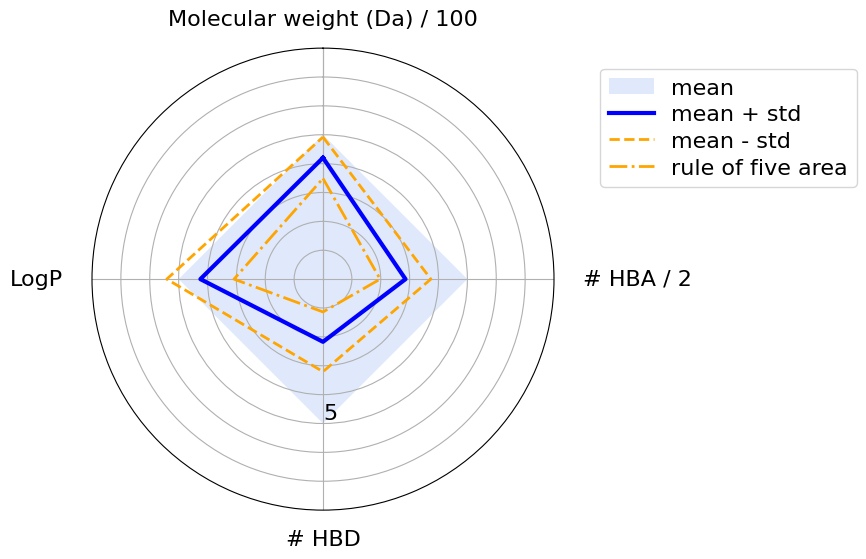

In [18]:
plot_radar(
    molecules_ro5_fulfilled_stats,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max,
)

蓝色方块表示分子的理化性质符合 Ro5 的区域。蓝线突出显示平均值，而橙色虚线显示标准差。我们可以看到平均值从未违反任何 Lipinski 规则。然而，根据标准偏差，某些属性的值大于 Ro5 阈值。这是可以接受的，因为根据 Ro5，可以违反四项规则之一。

我们绘制了违反 Ro5 的化合物数据集的雷达图。

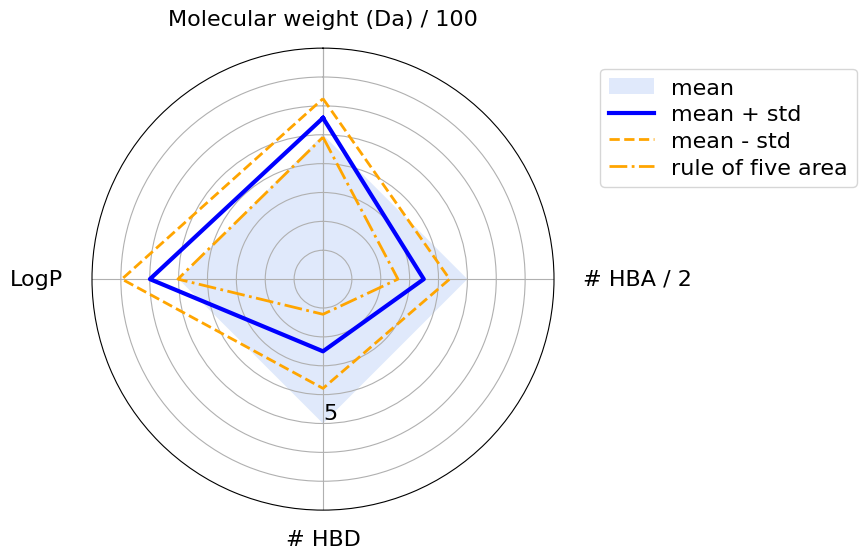

In [19]:
plot_radar(
    molecules_ro5_violated_stats,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max,
)

In [20]:
# 保存绘图
plt.savefig(DATA / "VEGFR2_radar_not_lipinski.png", dpi=300, bbox_inches="tight", transparent=True)

<Figure size 640x480 with 0 Axes>

我们发现化合物大多因其 logP 值和分子量而违反 Ro5。

了解了 Lipinski 的 Ro5 作为估计化合物口服生物利用度的衡量标准，并且我们已使用 rdkit 在数据集上应用了该规则。请注意，药物也可以通过其他途径给药，即吸入、皮肤渗透和注射。
